# Worked Exercises
<strong>Author:</strong> Nicholas Hunt-Walker<br/>
<strong>Latest Update:</strong> 12/14/2015

This notebook contains my own work for trying to answer the exercises from Hogg, Bovy, & Lang 2010's Data Analysis Recipes: Fitting a Model to Data ([link](http://www.arxiv.org/abs/1008.4686)). The following menu contains links to jump to different exercises:
- <a href="#Exercise-1">Exercise 1</a>
- <a href="#Exercise-2">Exercise 2</a>
- <a href="#Exercise-3">Exercise 3</a>
- <a href="#Exercise-4">Exercise 4</a>
- <a href="#Exercise-5">Exercise 5</a>
- <a href="#Exercise-6">Exercise 6</a>
- <a href="#Exercise-7">Exercise 7</a>
- <a href="#Exercise-8">Exercise 8</a>
- <a href="#Exercise-9">Exercise 9</a>
- <a href="#Exercise-10">Exercise 10</a>
- <a href="#Exercise-11">Exercise 11</a>
- <a href="#Exercise-12">Exercise 12</a>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import corner
import emcee

## Exercise 1
Using the standard linear algebra method of this Section, fit
the straight line $y = m x + b$ to the $x$, $y$, and $\sigma_y$ values for data points 5
through 20 in Table 1 on page 6. That is, ignore the first four data points,
and also ignore the columns for $\sigma_x$ and $\rho_{xy}$. Make a plot showing the points,
their uncertainties, and the best-fit line. Your plot should end up looking
like Figure 1. What is the standard uncertainty variance $\sigma^2_m$ on the slope of
the line?

In [2]:
x = np.array([203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
y = np.array([495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
dy = np.array([21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])

Can solve for parameters $m, b$ by doing
$$\begin{bmatrix}b \\ m\end{bmatrix} = [A^TC^{-1}A]^{-1}[A^TC^{-1}Y]$$
where $[A^TC^{-1}A]^{-1} = \begin{bmatrix}\sigma_b^2 & \sigma_{bm}\\\sigma_{mb} & \sigma_{m}^2\end{bmatrix}$

Note, when using  `np.matrix`, everything is transposed from the outset. So anything you would transpose, leave alone, and anything you would leave alone, transpose.

In [3]:
Y = np.matrix(y)
C = np.matrix(np.identity(len(dy)) * dy**2)
A = np.matrix([np.ones(len(x)), x])

In [4]:
left = np.dot(np.dot(A, C.I), A.T).I
right = np.dot(np.dot(A, C.I), np.matrix(Y).T)
theta = np.dot(left, right)

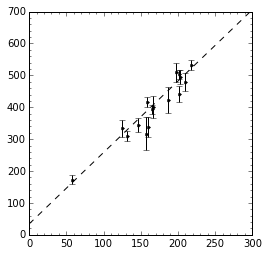

In [5]:
plt.figure(figsize=(4,4))
plt.errorbar(x, y, dy, fmt='.k')
plt.plot([0, 300], theta[0,0] + np.array([0, 300])*theta[1,0], color='k', linestyle='--')
plt.xlim(0, 300)
plt.ylim(0, 700)
plt.minorticks_on()
plt.show()

In [6]:
# standard uncertainty variance on the slope of the line
print "The standard uncertainty variance sig_m**2: %.2e" % left[1, 1]
print "The standard uncertainty variance sig_b**2: %.2f" % left[0, 0]

The standard uncertainty variance sig_m**2: 1.16e-02
The standard uncertainty variance sig_b**2: 332.92


## Exercise 2
Repeat Exercise 1 but for all the data points in Table 1 on
page 6. Your plot should end up looking like Figure 2. What is the standard
uncertainty variance $\sigma_m^2$ on the slope of the line? Is there anything you don’t
like about the result? Is there anything different about the new points you
have included beyond those used in Exercise 1?

In [7]:
x = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
y = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
dy = np.array([61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])
dx = np.array([9, 4, 11, 7, 5, 9, 4, 4, 11, 7, 5, 5, 5, 6, 6, 5, 9, 8, 6, 5])
r_xy = np.array([-0.84, 0.31, 0.64, -0.27, -0.33, 0.67, -0.02, -0.05, -0.84, -0.69, 0.30, -0.46, -0.03, 0.5, 0.73, -0.52, 0.90, 0.40, -0.78, -0.56])

In [8]:
Y = np.matrix(y)
C = np.matrix(np.identity(len(dy)) * dy**2)
A = np.matrix([np.ones(len(x)), x])

In [9]:
left = np.dot(np.dot(A, C.I), A.T).I
right = np.dot(np.dot(A, C.I), np.matrix(Y).T)
theta = np.dot(left, right)

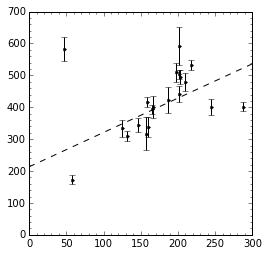

In [10]:
plt.figure(figsize=(4,4))
plt.errorbar(x, y, dy, fmt='.k')
plt.plot([0, 300], theta[0,0] + np.array([0, 300])*theta[1,0], color='k', linestyle='--')
plt.xlim(0, 300)
plt.ylim(0, 700)
plt.minorticks_on()
plt.show()

In [11]:
# standard uncertainty variance on the slope of the line
print "The standard uncertainty variance sig_m**2: %.2e" % left[1, 1]

The standard uncertainty variance sig_m**2: 5.99e-03


In [12]:
print theta

[[ 213.27349198]
 [   1.07674752]]


The result is heavily affected by the new outliers to the point where the "best fit" line doesn't really do well in describing the data.

## Exercise 3
Generalize the method of this Section to fit a general quadratic (second-order) relationship. Add another column to matrix $A$ containing the values $x^2_i$, and another element to vector $X$ (call it $q$). Then re-do Exercise 1 but fitting for and plotting the best quadratic relationship
$$g(x) = qx^2 + mx + b$$

In [13]:
x = np.array([203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
y = np.array([495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
dy = np.array([21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])

In [14]:
Y = np.matrix(y)
C = np.matrix(np.identity(len(dy)) * dy**2)
A = np.matrix([np.ones(len(x)), x, x**2])

In [15]:
left = np.dot(np.dot(A, C.I), A.T).I
right = np.dot(np.dot(A, C.I), np.matrix(Y).T)
theta = np.dot(left, right)

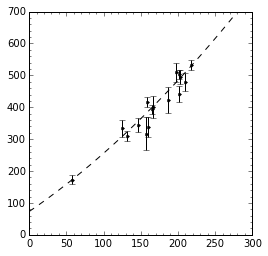

In [16]:
plt.figure(figsize=(4,4))
plt.errorbar(x, y, dy, fmt='.k')
xtest = np.linspace(0, 300, 1000)
plt.plot(xtest, theta[0,0] + xtest*theta[1,0] + xtest**2*theta[2,0], color='k', linestyle='--')
plt.xlim(0, 300)
plt.ylim(0, 700)
plt.minorticks_on()
plt.show()

In [17]:
print "b: %.1f ± %.1f" % (theta[0,0], np.sqrt(left[0,0]))
print "m: %.2f ± %.2f" % (theta[1,0], np.sqrt(left[1,1]))
print "q: %.2e ± %.2e" % (theta[2,0], np.sqrt(left[2,2]))

b: 72.9 ± 38.9
m: 1.60 ± 0.58
q: 2.30e-03 ± 2.03e-03


## Exercise 4
Imagine a set of $N$ measurements $t_i$, with uncertainty variances $\sigma_{ti}^2$, all of the same (unknown) quantity $T$ . Assuming the generative model that each $t_i$ differs from $T$ by a Gaussian-distributed offset, taken from a Gaussian with zero mean and variance $\sigma_{ti}^2$, write down an expression for the log likelihood ln $\mathscr{L}$ for the data given the model parameter $T$. Take a derivative and show that the maximum likelihood value for $T$ is the usual weighted mean.

$$p(t_i | T, \sigma_{ti}) = \frac{1}{\sqrt{2\pi\sigma_{ti}^2}}\exp\left[{-\frac{(t_i - T)^2}{2\sigma_{ti}^2}}\right]$$

$$\mathscr{L} = \prod_{i=1}^N p(t_i | T, \sigma_{ti}) = \prod_{i=1}^N\frac{1}{\sqrt{2\pi\sigma_{ti}^2}}\exp\left[{-\frac{(t_i - T)^2}{2\sigma_{ti}^2}}\right]$$

$$\ln{\mathscr{L}} = \left(\ln{\prod_{i=1}^N\frac{1}{\sqrt{2\pi\sigma_{ti}^2}}}\right)\left( \ln{\prod_{i=1}^N\exp{\left[-\frac{(t_i - T)^2}{2\sigma_{ti}^2}\right]}}\right)$$

$$\ln{\mathscr{L}} = \left(\sum_{i=1}^N \ln{\frac{1}{\sqrt{2\pi\sigma_{ti}^2}}}\right) - \left[\sum_{i=1}^N\frac{(t_i - T)^2}{2\sigma_{ti}^2} \right]$$

$$\frac{d\ln\mathscr{L}}{dt_i} = -\frac{d}{dt_i}\left[\sum_{i=1}^N\frac{(t_i - T)^2}{2\sigma_{ti}^2} \right]\\
= -\sum_{i=1}^N \frac{2(t_i - T)}{2\sigma_{ti}^2}\\
= \sum_{i=1}^N \frac{T - t_i}{\sigma_{ti}^2}$$

max $\mathscr{L}$ when $\frac{d\ln\mathscr{L}}{dt_i} = 0$

$$ \sum_{i=1}^N \frac{T}{\sigma_{ti}^2} = \sum_{i=1}^N \frac{t_i}{\sigma_{ti}^2}\\
T\sum_{i=1}^N 1 = \sum_{i=1}^N t_i\\
T = \frac{\sum_{i=1}^N t_i}{\sum_{i=1}^N 1} = \frac{1}{N}\sum_{i=1}^N t_i
$$

Take the matrix formulation for $\chi^2$ given in equation (7) and take derivatives to show that the minimum is at the matrix location given in equation (5)

Equation (7) is:
\begin{eqnarray}
\chi^2 = \left[\mathbf{Y - AX}\right]^T\mathbf{C}^{-1}\left[\mathbf{Y - AX}\right]
\end{eqnarray}

Equation (5) is:
\begin{eqnarray}
\mathbf{X} = \mathbf{[A^TC^{-1}A]^{-1}[A^TC^{-1}Y]}
\end{eqnarray}

I have no real idea how to approach this one.
\begin{eqnarray}
\frac{d\chi^2}{dx} &=& \frac{d}{dx}(Y-AX)^TC^{-1}[Y-AX]
\end{eqnarray}

## Exercise 6
In text, the following mixture model is proposed:
\begin{align}
\mathscr{L} \propto \prod_{i=1}^{N}\left[\frac{1 - P_b}{\sqrt{2\pi\sigma^2_{yi}}} \exp{\left(-\frac{[y_i-mx_i-b]^2}{2\sigma_{yi}^2}\right)} + \frac{P_b}{\sqrt{2\pi[V_b + \sigma_{yi}^2]}}\exp{\left(-\frac{[y_i - Y_b]^2}{2[V_b + \sigma_{yi}^2]} \right)}\right]
\end{align}

Here, $\mathscr{L}$ is the Likelihood of the data given parameters $(m,b,P_b,V_b,Y_b)$, $m$ is the slope of the line, $b$ is the line's intercept, $sigma_{yi}$ is the uncertainty in the $y$ data, $P_b$ is the prior probability, $V_b$ is the variance of the bad-data distribution, and $Y_b$ is the mean of the bad-data distribution.

Using this mixture model, find the best-fit (the maximum <i>a posteriori</i>, MAP) straight line $y=mx+b$ for the $x$, $y$, and $\sigma_y$ for the data.

Before choosing the MAP line, marginalize over parameters $(P_b, V_b, Y_b)$. That is, if you are taking a sampling approach, this means sampling the full five-dimensional parameter space but then choosing the peak value in the histogram of samples in the two-dimensional parameter space (m, b).

Make one plot showing this two-dimensional histogram and another showing the points, their uncertainties, and the MAP line. 
- How does this compare to the standard result you obtained in Exercise 2? 
- Do you like the MAP line better or wose?
- For extra credit, plot a sampling of 10 lines drawn from the marginalized posterior distribution for $(m,b)$ (marginalized over $P_b, Y_b, V_b$) and plot the samples as a set of light grey or transparent lines.

<strong>Brute force this sucker and calculate $\mathscr{L}$ for all acceptable combinations of $m$ and $b$ </strong>

In [18]:
x = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
y = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
dy = np.array([61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])
dx = np.array([9, 4, 11, 7, 5, 9, 4, 4, 11, 7, 5, 5, 5, 6, 6, 5, 9, 8, 6, 5])
r_xy = np.array([-0.84, 0.31, 0.64, -0.27, -0.33, 0.67, -0.02, -0.05, -0.84, -0.69, 0.30, -0.46, -0.03, 0.5, 0.73, -0.52, 0.90, 0.40, -0.78, -0.56])

In [19]:
def likelihood(x, y, sig, m, b, Pb, Yb, Vb):
    first_term = (1 - Pb) / np.sqrt(2 * np.pi * sig**2) * np.exp(-(y - m*x - b)**2 / (2 * sig**2))
    second_term = Pb / np.sqrt(2 * np.pi * (Vb + sig**2)) * np.exp(-(y - Yb)**2 / (2 * (Vb + sig**2)))
    the_sum = first_term + second_term
    return np.product(the_sum)

def log_prior(m, b, Pb, Vb):
    if (0.0 < m < 10.0) & (-500.0 < b < 500.0) & (0.0 < Pb < 1.0) & (Vb > 0):
        return 0.0
    return -np.inf
    
def log_posterior(theta, x, y, sig):
    m, b, Pb, Yb, Vb = np.transpose(theta)
    ln_prior = log_prior(m, b, Pb, Vb)
    if not np.isfinite(ln_prior):
        return ln_prior
    ln_likelihood = np.log(likelihood(x, y, sig, m, b, Pb, Yb, Vb))
    result = ln_prior + ln_likelihood
    return result

In [20]:
# starting positions in (m, b, Pb, Yb, Vb) for each walker.
# I'm broad using eyeball estimates to start m, and b, as well as 
# a reasonable estimate for Pb
guesses = np.array([1, 200, 0.5, 1, 1])
#decide on number of parameters to look over and number of walkers to use
ndim, nwalkers = len(guesses), 100

pos = [guesses + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [21]:
#setup the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y, dy))

In [22]:
#run emcee for N steps, starting at the previously-specified positions
n_steps = 10000
sampler.run_mcmc(pos, n_steps);

/Users/Nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log


In [23]:
samples = sampler.chain[:, 250:, :]#.reshape((-1, ndim))

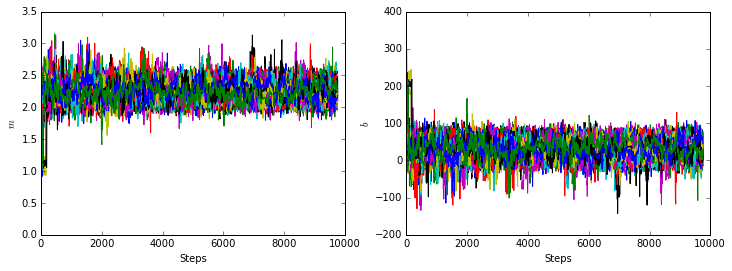

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(samples[:,:,0].T)
# plt.plot([0, 50000], [guesses[0], guesses[0]], linestyle="--", color='k')
plt.ylabel("$m$")
plt.xlabel("Steps")

plt.subplot(122)
plt.plot(samples[:,:,1].T)
# plt.plot([0, 50000], [guesses[1], guesses[1]], linestyle="--", color='k')
plt.ylabel("$b$")
plt.xlabel("Steps")

plt.show()

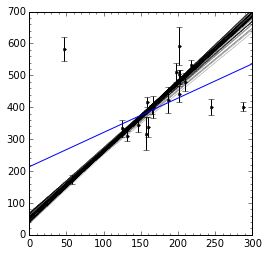

In [25]:
x1 = np.array([0, 300])
plt.figure(figsize=(4,4))
for m, b, Pb, Yb, Vb in samples[0, np.random.randint(len(samples), size=1000)]:
    plt.plot(x1, m*x1 + b, color="k", alpha=0.02)    

plt.errorbar(x, y, dy, fmt='.k')
plt.plot(x1, 1.0767*x1 + 213.2735)

plt.xlim(0, 300)
plt.ylim(0, 700)
plt.minorticks_on()
plt.show()

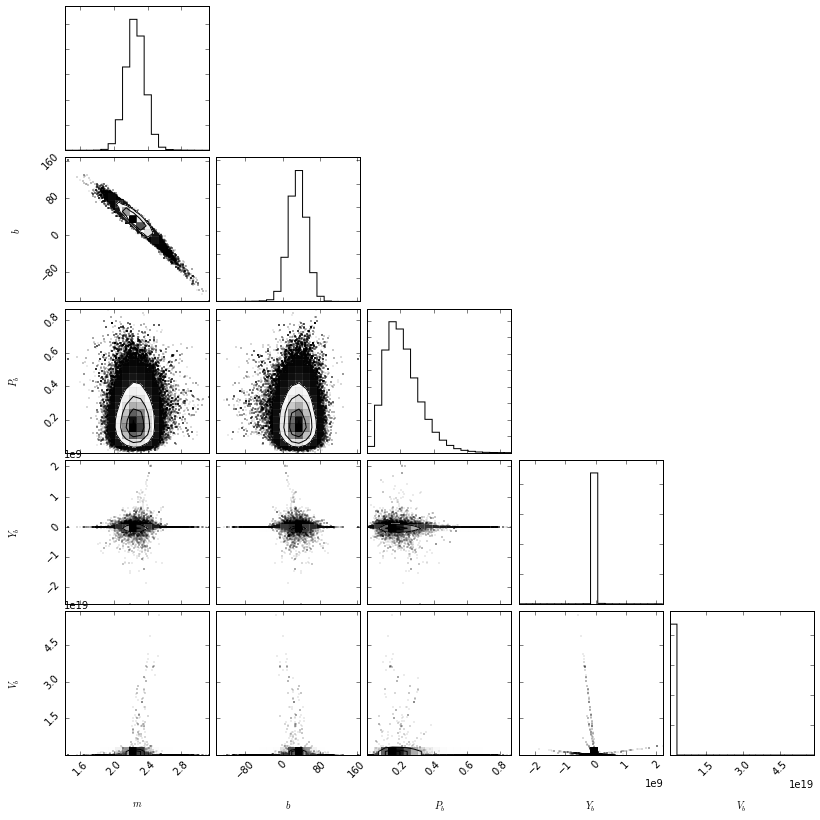

In [26]:
fig = corner.corner(samples[:, 1000:, :].reshape((-1, ndim)), 
                    labels=["$m$", "$b$", "$P_b$", "$Y_b$", "$V_b$"])

## Exercise 7

Solve Exercise 6, but now plot the fully marginalized (over $m$, $b$, $V_b$, $Y_b$) posterior distribution function for parameter $P_b$. Is this distribution peaked about where you would expect, given the data?

<font color='red'>Already shown above in the corner plot</font>

Now repeat the problem, but dividing all the data uncertainty variances $\sigma_{yi}^2$ by 4 (or dividing the uncertainties $\sigma_{yi}$ by 2). Again plot the fully marginalized posterior distribution function for parameter $P_b$. Discuss.

In [27]:
guesses = np.array([1, 200, 0.5, 1, 1])
ndim, nwalkers = len(guesses), 100

pos = [guesses + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [28]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y, dy * 0.5))
n_steps = 5000
sampler.run_mcmc(pos, n_steps);

/Users/Nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log


In [29]:
samples = sampler.chain[:, 1000:, :]#.reshape((-1, ndim))

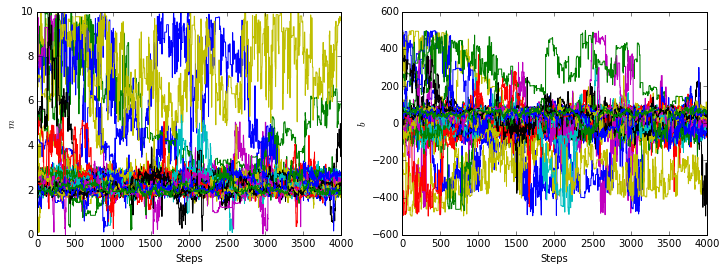

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(samples[:,:,0].T)
plt.ylabel("$m$")
plt.xlabel("Steps")

plt.subplot(122)
plt.plot(samples[:,:,1].T)
plt.ylabel("$b$")
plt.xlabel("Steps")

plt.show()

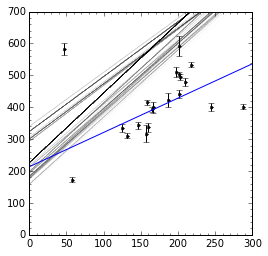

In [31]:
x1 = np.array([0, 300])
plt.figure(figsize=(4,4))
for m, b, Pb, Yb, Vb in samples[0, np.random.randint(len(samples), size=500)]:
    plt.plot(x1, m*x1 + b, color="k", alpha=0.02)    

plt.errorbar(x, y, dy/2, fmt='.k')
plt.plot(x1, 1.0767*x1 + 213.2735)

plt.xlim(0, 300)
plt.ylim(0, 700)
plt.minorticks_on()
plt.show()

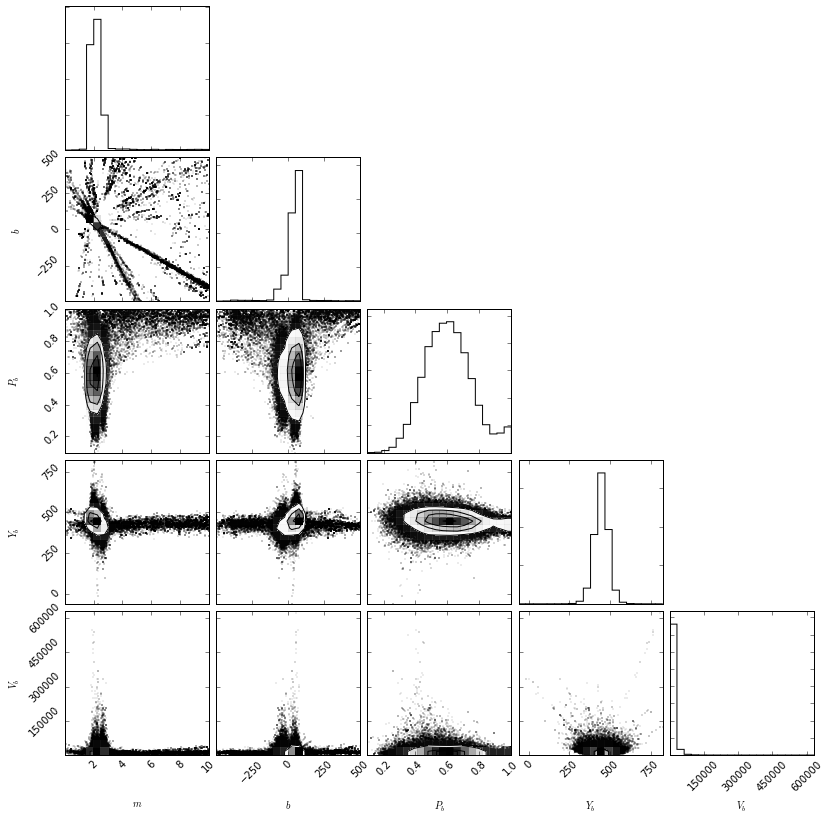

In [32]:
fig = corner.corner(samples[:, :, :].reshape((-1, ndim)), 
                    labels=["$m$", "$b$", "$P_b$", "$Y_b$", "$V_b$"])

## Regarding Uncertainties in the Best-Fit Parameters

### Standard Estimation of $\sigma_m^2$, $\sigma_b^2$, and $\sigma_{mb}^2$
$[A^TC^{-1}A]^{-1} = \begin{bmatrix}\sigma_b^2 & \sigma_{bm}\\\sigma_{mb} & \sigma_{m}^2\end{bmatrix}$

### Bootstrap Estimation of $\sigma_m^2$, $\sigma_b^2$, and $\sigma_{mb}^2$
For each of $M$ bootstrap trials $j$, draw $N$ data points randomly from our length $N$ sample \emph{with replacement}. To make it easier, use
```
N = len(y)
rand_indicies = np.random.randint(N, size=N)
```
during each trial. To estimate $m_j$ and $b_j$. An estimate of your uncertainty variance on $m$ is
\begin{align}
\sigma_m^2 = \frac{1}{M}\sum_j^M [m_j - m]^2
\end{align}

on $b$ it's similar
\begin{align}
\sigma_b^2 = \frac{1}{M}\sum_j^M [b_j - b]^2
\end{align}

For the covariance between parameters $m$ and $b$:
\begin{align}
\sigma_{mb}^2 = \frac{1}{M}\sum_j^M [m_j - m][b_j - b]
\end{align}

### Jackknife Estimation of $\sigma_m^2$, $\sigma_b^2$, and $\sigma_{mb}^2$
Measure $m$ and $b$, $N$ times, each time leaving out random data point $i$. Then you calculate
\begin{align}
m = \frac{1}{N}\sum_{i=1}^Nm_i\\
b = \frac{1}{N}\sum_{i=1}^Nb_i\\
\end{align}

The uncertainty variance becomes
\begin{align}
\sigma_m^2 = \frac{N-1}{N}\sum^N_{i=1}[m_i - m]^2\\
\sigma_b^2 = \frac{N-1}{N}\sum^N_{i=1}[b_i - b]^2\\
\sigma_{mb}^2 = \frac{N-1}{N}\sum^N_{i=1}[m_i - m][b_i - b]\\
\end{align}

## Exercise 8
Compute the standard uncertainty $\sigma_m^2$ obtained for the slope of the line found by the standard fit you did in Exercise 2.

Then make jackknife (20 trials) and bootstrap estimates for the uncertainty $\sigma_m^2$.

How do the uncertainties compare and which seems most reasonable, given the data and uncertainties on the data?

In [33]:
# Standard Uncertainty
A = np.matrix([np.ones(len(x)), x])
C = np.matrix(np.identity(len(dy)) * dy**2)
Y = np.matrix(y)
left = np.dot(np.dot(A, C.I), A.T).I
right = np.dot(np.dot(A, C.I), Y.T)
b, m = np.dot(left, right)
sig_m2 = left[1, 1]
print "m, sigma_m^2, sigm_pct = {0}, {1}, {2} %".format(float(m), sig_m2, np.sqrt(sig_m2) / float(m) * 100)
print "b, sigma_b^2, sigb_pct = {0}, {1}, {2} %".format(float(b), right[0,0], np.sqrt(right[0, 0]) / float(b) * 100)

m, sigma_m^2, sigm_pct = 1.07674752417, 0.00599181008007, 7.18894461592 %
b, sigma_b^2, sigb_pct = 213.273491976, 18.5703313431, 2.02056556133 %


In [34]:
# Bootstrap Uncertainty Estimate using Least Squares Regression
num_trials = 20
def bootstrap_regress(x, y, dy, n_trials):
    intcpt_arr = np.zeros(num_trials)
    slope_arr = np.zeros(num_trials)
    np.random.seed(4)
    true_x = x
    true_y = y
    true_dy = dy
    
    for trial in range(num_trials):
        indices = np.random.randint(len(y), size=len(y))
        x = true_x[indices]
        y = true_y[indices]
        dy = true_dy[indices]

        A = np.matrix([np.ones(len(x)), x])
        C = np.matrix(np.identity(len(dy)) * dy ** 2)
        Y = np.matrix(y)
        
        left = np.dot(np.dot(A, C.I), A.T).I
        right = np.dot(np.dot(A, C.I), Y.T)
        b, m = np.dot(left, right)
        
        intcpt_arr[trial] = float(b)
        slope_arr[trial] = float(m)
        
    return intcpt_arr, slope_arr

intcpts, slopes = bootstrap_regress(x, y, dy, num_trials)
sig_m2_boot = (1./num_trials) * np.sum((slopes - float(m)) ** 2)
sig_b2_boot = (1./num_trials) * np.sum((intcpts - float(b)) ** 2)

print "Bootstrap Results\n====================="
print "m, sigma_m^2, sigm_pct = {0}, {1}, {2} %".format(np.mean(slopes), sig_m2_boot, np.sqrt(sig_m2_boot) / np.mean(slopes) * 100)
print "b, sigma_b^2, sigb_pct = {0}, {1}, {2} %".format(np.mean(intcpts), sig_b2_boot, np.sqrt(sig_b2_boot) / np.mean(intcpts) * 100)

Bootstrap Results
m, sigma_m^2, sigm_pct = 1.18151745268, 0.326149190599, 48.3356998811 %
b, sigma_b^2, sigb_pct = 201.228165661, 8908.91537623, 46.9054869046 %


In [35]:
# Jackknife Uncertainty Estimate using Least Squares Regression
def jackknife_regress(x, y, dy, n_trials):
    intcpt_arr = np.zeros(num_trials)
    slope_arr = np.zeros(num_trials)
    np.random.seed(4)
    true_x, true_y, true_dy = x, y, dy
    
    for trial in range(num_trials):
        indices = np.arange(0, len(true_y))
        leave_out = np.random.randint(len(y))
        indices = indices[indices != leave_out]
        
        x = true_x[indices]
        y = true_y[indices]
        dy = true_dy[indices]

        A = np.matrix([np.ones(len(x)), x])
        C = np.matrix(np.identity(len(dy)) * dy ** 2)
        Y = np.matrix(y)
        
        left = np.dot(np.dot(A, C.I), A.T).I
        right = np.dot(np.dot(A, C.I), Y.T)
        b, m = np.dot(left, right)
        
        intcpt_arr[trial] = float(b)
        slope_arr[trial] = float(m)
        
    return intcpt_arr, slope_arr

intcpts, slopes = jackknife_regress(x, y, dy, num_trials)
m_jack = np.mean(slopes)
b_jack = np.mean(intcpts)
sig_m2_jack = ((num_trials - 1.) / num_trials) * np.sum((slopes - float(m_jack)) ** 2)
sig_b2_jack = ((num_trials - 1.) / num_trials) * np.sum((intcpts - float(b_jack)) ** 2)

print "Jackknife Results\n====================="
print "m, sigma_m^2, sigm_pct = {0}, {1}, {2} %".format(np.mean(slopes), sig_m2_jack, np.sqrt(sig_m2_jack) / np.mean(slopes) * 100)
print "b, sigma_b^2, sigb_pct = {0}, {1}, {2} %".format(np.mean(intcpts), sig_b2_jack, np.sqrt(sig_b2_jack) / np.mean(intcpts) * 100)

Jackknife Results
m, sigma_m^2, sigm_pct = 1.06075707301, 0.735414586517, 80.8444449231 %
b, sigma_b^2, sigb_pct = 216.080630182, 22603.2279328, 69.57759204 %


The uncertainties for the bootstrap method seem most reasonable. The regular least-squares regression estimation method produces uncertainties that are unrealistically small. The jackknife method produces far larger uncertainties than I'm comfortable assuming considering the scatter isn't *that* large.

## Exercise 9
Re-do Exercise 6---the mixture-based outlier model---but just with the "inlier" points 5 through 20 from Table 1. Then do the same again, but with all measurement uncertainties reduced by a factor of 2 (uncertainty variances reduced by a factor of 4). Plot the marginalized posterior probability distributions for line parameters ($m,b$) in both cases. Your plots should look like those in Figure 6. Did these posterior distributions get smaller or larger with the reduction in the data-point uncertainties? Compare this with the dependence of the standard uncertainty estimate $[\pmb{A}^T\pmb{C}^{-1}\pmb{A}]^{-1}$

In [36]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x[5:21], y[5:21], dy[5:21]))
n_steps = 5000
sampler.run_mcmc(pos, n_steps);

In [37]:
samples = sampler.chain[:, 1000:, :]#.reshape((-1, ndim))

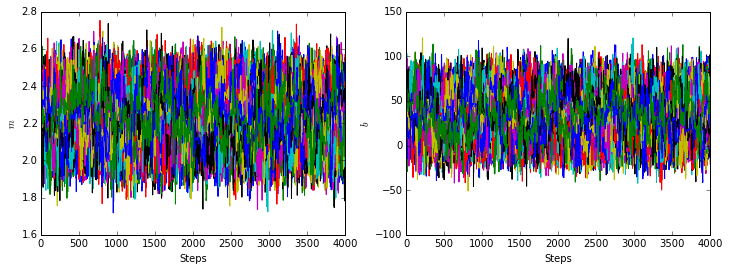

In [38]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(samples[:,:,0].T)
plt.ylabel("$m$")
plt.xlabel("Steps")

plt.subplot(122)
plt.plot(samples[:,:,1].T)
plt.ylabel("$b$")
plt.xlabel("Steps")

plt.show()

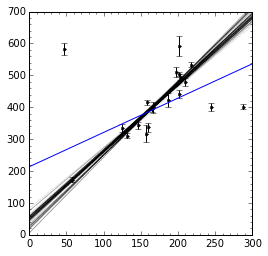

In [39]:
x1 = np.array([0, 300])
plt.figure(figsize=(4,4))
for m, b, Pb, Yb, Vb in samples[0, np.random.randint(len(samples), size=500)]:
    plt.plot(x1, m*x1 + b, color="k", alpha=0.02)    

plt.errorbar(x, y, dy/2, fmt='.k')
plt.plot(x1, 1.0767*x1 + 213.2735)

plt.xlim(0, 300)
plt.ylim(0, 700)
plt.minorticks_on()
plt.show()

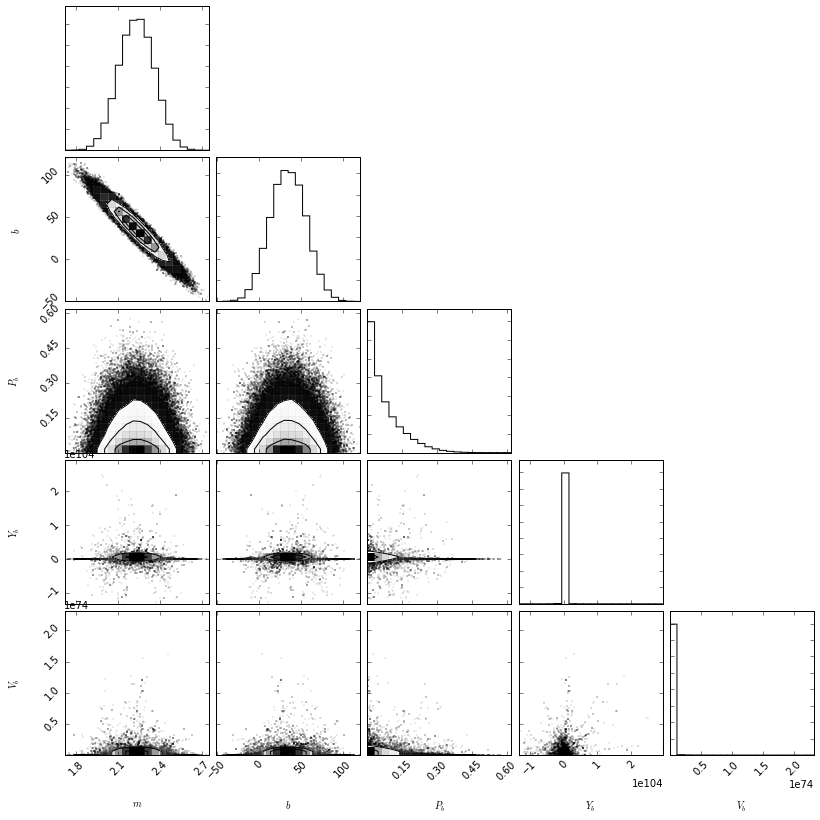

In [40]:
fig = corner.corner(samples[:, :, :].reshape((-1, ndim)), 
                    labels=["$m$", "$b$", "$P_b$", "$Y_b$", "$V_b$"])

In [41]:
## And now with reduced uncertainties
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x[5:21], y[5:21], dy[5:21] * 0.5))
n_steps = 5000
sampler.run_mcmc(pos, n_steps);

/Users/Nick/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: divide by zero encountered in log


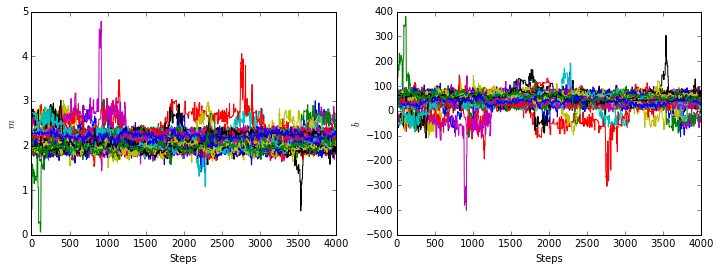

In [42]:
samples = sampler.chain[:, 1000:, :]
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(samples[:,:,0].T)
plt.ylabel("$m$")
plt.xlabel("Steps")

plt.subplot(122)
plt.plot(samples[:,:,1].T)
plt.ylabel("$b$")
plt.xlabel("Steps")

plt.show()

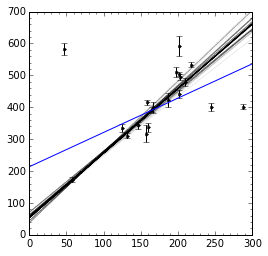

In [43]:
x1 = np.array([0, 300])
plt.figure(figsize=(4,4))
for m, b, Pb, Yb, Vb in samples[0, np.random.randint(len(samples), size=500)]:
    plt.plot(x1, m*x1 + b, color="k", alpha=0.02)    

plt.errorbar(x, y, dy/2, fmt='.k')
plt.plot(x1, 1.0767*x1 + 213.2735)

plt.xlim(0, 300)
plt.ylim(0, 700)
plt.minorticks_on()
plt.show()

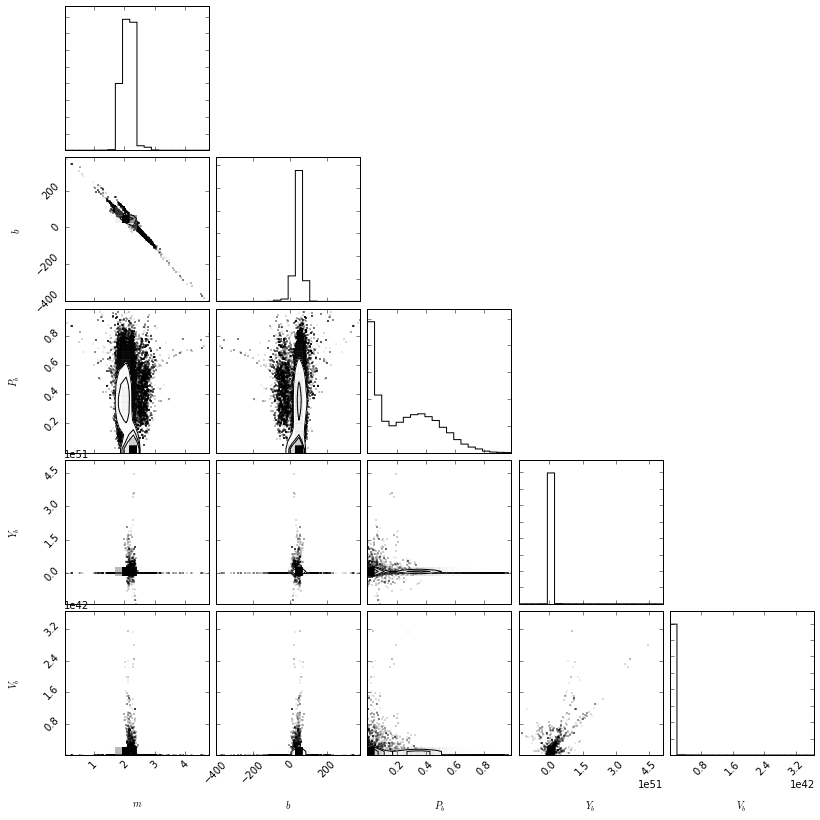

In [44]:
fig = corner.corner(samples[:, :, :].reshape((-1, ndim)), 
                    labels=["$m$", "$b$", "$P_b$", "$Y_b$", "$V_b$"])

The posterior distributions got much larger with the reduction in uncertainties. They're way underestimated.

If individual data-points $y_i$ have been estimated by some means that effectively relies on shared information, then there will be large covariances among the data points. These covariances bring off-diagonal elements into the covariance matrix $\mathbf{C}$, which was previously trivially constructed under the assumption that all covariances are precisely zero.

Once the off-diagonal elements are non-zero, $\chi^2$ must be computed by the matrix expression:
$$\chi^2 = [Y-AX]^TC^{-1} [Y-AX]$$

This is equivalent to replacing the sum over $i$ to two sums over $i$ and $j$ and considering all cross terms
$$\chi^2 = \sum_{i=1}^N\sum_{j=1}^N w_{ij}[y_i - f(x_i)][y_j - f(x_j)]$$

## Exercise 10
Assess the $\chi^2$ value for the fit performed in Exercise 1. Is the fit good?

In [45]:
#The data for Exercise 1
x = np.array([203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
y = np.array([495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
dy = np.array([21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])

In [46]:
#Re-create that fit
Y = np.matrix(y)
C = np.matrix(np.identity(len(y)) * dy**2)
A = np.matrix((np.ones(len(y)), x))
left = np.dot(np.dot(A, C.I), A.T).I
right = np.dot(np.dot(A, C.I), np.matrix(Y).T)
theta = np.dot(left, right)
b, m = theta
b, m = float(b), float(m)

In [47]:
#Chi-squared with sums
chi_sq1 = np.sum((1./dy**2) * (y - (m*x + b))**2)
print chi_sq1

18.6807699112


In [48]:
#Chi-squared with matrices
prod = np.matrix(Y - np.dot(A.T, theta).T)
middle = C.I
chi_sq2 = np.dot(np.dot(prod, middle), prod.T)
print chi_sq2

[[ 18.68076991]]


In [49]:
#Chi-squared per degrees of freedom
print chi_sq2/(len(y)-1)

[[ 1.24538466]]


This is a pretty good fit. Aside from the plot showing a linear fit that generally follows the points (whether the points themselves are linear or not), the reduced chi-squared metric is pretty close to 1. This is indicating that on average the squared difference between my model and each point is roughly on par (actually slightly larger) than the measured inherent variance of each point. Can't ask for too much better than that when you're assuming the functional form of a distribution.

##10 Continued:
What about for the fit performed in Exercise 2?

In [50]:
x = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
y = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
dy = np.array([61, 25, 38, 15, 21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])
dx = np.array([9, 4, 11, 7, 5, 9, 4, 4, 11, 7, 5, 5, 5, 6, 6, 5, 9, 8, 6, 5])
r_xy = np.array([-0.84, 0.31, 0.64, -0.27, -0.33, 0.67, -0.02, -0.05, -0.84, -0.69, 0.30, -0.46, -0.03, 0.5, 0.73, -0.52, 0.90, 0.40, -0.78, -0.56])

In [51]:
Y = np.matrix(y)
C = np.matrix(np.identity(len(y)) * dy**2)
A = np.matrix((np.ones(len(y)), x))
left = np.dot(np.dot(A, C.I), A.T).I
right = np.dot(np.dot(A, C.I), np.matrix(Y).T)
theta = np.dot(left, right)
b, m = theta
b, m = float(b), float(m)
prod = np.matrix(Y - np.dot(A.T, theta).T)
middle = C.I
chi_sq3 = np.dot(np.dot(prod, middle), prod.T)
print "Chi-squared: ", chi_sq3
print "Reduced chi-squared: ", chi_sq3 / (len(y) - 1)

Chi-squared:  [[ 289.96372278]]
Reduced chi-squared:  [[ 15.26124857]]


This is a horrid fit. Squared differences 15x larger than what's described by measured variances.

##Exercise 11
Redo the fit of Exercise 1 but setting all $\sigma_{yi}^2 = S$, that is, ignoring the uncertainties and replacing them all with the same value $S$. What uncertainty variance $S$ would make $\chi^2 = N-2$? How does it compare to the mean and median of the uncertainty variances $\{\sigma_{yi}^2\}^N_{i=1}$?

In [52]:
#The data for Exercise 1
x = np.array([203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
y = np.array([495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])
dy_true = np.array([21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22])

In [53]:
offsets = range(1, 2000)
chi_sq = np.zeros(len(offsets))

for ii in range(len(offsets)):
    offset = offsets[ii]
    dy = np.ones(len(y)) * np.sqrt(offset)
    Y = np.matrix(y)
    C = np.matrix(np.identity(len(y)) * dy**2)
    A = np.matrix((np.ones(len(y)), x))

    left = np.dot(np.dot(A, C.I), A.T).I
    right = np.dot(np.dot(A, C.I), np.matrix(Y).T)
    theta = np.dot(left, right)

    prod = np.matrix(Y - np.dot(A.T, theta).T)
    middle = C.I
    
    chi_sq[ii] = np.dot(np.dot(prod, middle), prod.T)


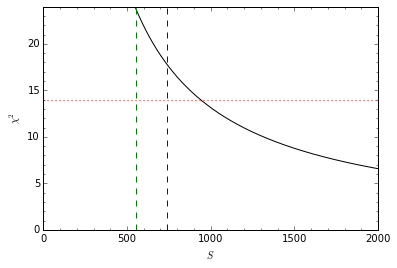

In [54]:
plt.plot(offsets, chi_sq, color='k')
plt.plot([0, 2000], [len(y)-2, len(y) - 2], linestyle=":", color="red")
plt.plot([np.mean(dy_true**2), np.mean(dy_true**2)], [0, 100], linestyle="--", color="blue")
plt.plot([np.median(dy_true**2), np.median(dy_true**2)], [0, 100], linestyle="--", color="green")
plt.xlabel("$S$")
plt.ylim(0, 24)
plt.ylabel("$\chi^2$")
plt.minorticks_on()
plt.show()

The uniform offset $S$ necessary to make $\chi^2 = N-2$ is quite larger than both the mean and median variances of the true data set. If the data were in fact linear with some measurement uncertainties, perhaps the uncertainties themselves are underestimated.

##Exercise 12
- Flesh out and write all equations for the Bayesian uncertainty estimation and marginalization procedure described in Section 6. Note that the inference and marginalization would be very expensive without excellent sampling tools! Make the additional (unjustified) assumption that all the uncertainties have the same variance $\sigma_{yi}^2 = S$ to make the problem tractable. 

- Apply the method to the x and y values for points 5 through 20. Make a plot showing the points, the maximum a posteriori value of the uncertainty variance as error bars, and the maximum a posteriori straight line. 

- For extra credit, plot two straight lines, one that is maximum a posteriori for the full posterior and one that is the same but for the posterior after the uncertainty variance $S$ has been marginalized out. 

- Also plot two sets of error bars, one that shows the maximum for the full posterior and one for the posterior after the line parameters have been marginalized out.

### Bayesian uncertainty estimation
**Prior on uncertainties $\{\sigma_{yi}^2\}_{i=1}^N$**: some value between zero and the maximum of the data. Assume uncertainties are flat for ease $\{\sigma_{yi}^2\}_{i=1}^N = S$.
\begin{align}
p(S\,|\,I) &=& 1 &,& 0 < S < \text{max}(y)\\
                 &=& 0 &,& \text{elsewhere}
\end{align}

Priors on slope and intercept (just from looking at the data):
\begin{align}
p(m\,|\,I) &=& 1 &,& 0 < m < 10\\
       &=& 0 &,& \text{elsewhere}\\
p(b\,|\,I) &=& 1 &,& -500.0 < b < 500.0\\
       &=& 0 &,& \text{elsewhere}
\end{align}

Total prior on estimated parameters:
\begin{align}
p(m,b,S\,|\,I) = p(m\,|\,I)p(b\,|\,I)p(S\,|\,I)
\end{align}

**Likelihood**:
$$
p(y_i\,|\,x_i,m,b,S) = \frac{1}{\sqrt{2\pi S}}\exp\left(-\frac{[y_i - mx_i - b]^2}{2S} \right)\\
p(\{y_i\}_{i=1}^N\,|m,b,S,I) = \prod_{i=1}^N p(y_i\,|\,x_i,m,b,S)
$$

**Posterior**:
$$
p(m, b, S\,|\,\{y_i\}_{i=1}^N, I) = \frac{p(\{y_i\}_{i=1}^N\,|m,b,S,I)p(m,b,S\,|\,I)}{p(\{y_i\}_{i=1}^N\,|\,I)}
$$

In [55]:
x = np.array([201, 244, 47, 287, 203, 58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186, 125, 218, 146])
y = np.array([592, 401, 583, 402, 495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423, 334, 533, 344])

In [56]:
x_samp = x[5:21]
y_samp = y[5:21]

In [64]:
def likelihood(x, y, S, m, b, Pb, Yb, Vb):
    ## The model generating my phenomenological data
    first_term = (1 - Pb) / np.sqrt(2 * np.pi * S) * np.exp(-(y - m*x - b)**2 / (2 * S))
    ## The background generating my outliers
    second_term = Pb / np.sqrt(2 * np.pi * (Vb + S)) * np.exp(-(y - Yb)**2 / (2 * (Vb + S)))
    ## Logarithmic so do a sum
    the_sum = first_term + second_term
    return np.product(the_sum)

def log_prior(m, b, Pb, S, y, Vb):
    ## See text in previous cells for justification of these ranges
    ## If all things satisfied, return my flat prior of p(theta|I) = 1
    if (0.0 < m < 10.0) & (-500.0 < b < 500.0) & (0.0 < Pb < 1.0) & (0 < S < max(y)) & (Vb > 0):
        return 0.0
    
    ## If any of my priors are not satisfied, I want to make sure to suppress that combo of params
    ## p(theta|I) = 0, when logged should be an extremely small number
    return -np.inf
    
def log_posterior(theta, x, y):
    ##Read in params
    m, b, S, Pb, Yb, Vb = np.transpose(theta)
    ##Calc prior
    ln_prior = log_prior(m, b, Pb, S, y, Vb)
    ## If prior is valid, continue to calculate posterior.
    ## If not, try different combo of parameters
    if not np.isfinite(ln_prior):
        return ln_prior
    
    ln_likelihood = np.log(likelihood(x, y, S, m, b, Pb, Yb, Vb))
    result = ln_prior + ln_likelihood
    return result

Next steps:
- Set up MCMC run
- ....do it
- get maximum a-posteriori line and use maximum a-posteriori flat variance as error bars. Note that maximum a-posteriori line params may not coincide with MAP variance